# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from config import weather_api_key, gkey
from citipy import citipy
from datetime import datetime
import os
import csv

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [4]:
# To make the DataFrame look cleaner, convert the cities list to titlecase and no
cities_list = []
for city in cities: 
    cities_list.append(city.title())
    
len(cities_list)

622

In [5]:
# Create the Empty DataFrame for the API Calls: Columns == Temperature, Humidity, Cloudiness, Windspeed

cities_df = pd.DataFrame(cities_list)
cities_df = cities_df.rename(columns={0: "City"})
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Date and Time"] = ""
cities_df["Max Temperature"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Windspeed"] = ""
cities_df

,City,Lat,Lng,Date and Time,Max Temperature,Humidity,Cloudiness,Windspeed
0,Punta Arenas,,,,,,,
1,Tura,,,,,,,
2,Ushuaia,,,,,,,
3,Cherskiy,,,,,,,
4,Vostok,,,,,,,
...,...,...,...,...,...,...,...,...
617,Andenes,,,,,,,
618,Ucluelet,,,,,,,
619,Sterling,,,,,,,
620,Charters Towers,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# # Test DataFrame and API Calls

# # This is the test code I used to limit my API calls while troubleshooting 

# base_weather_url = "http://api.openweathermap.org/data/2.5/weather?q="

# # test city
# city_test = ["Punta Arenas"]
# cities_test_df = pd.DataFrame(city_test)
# cities_test_df = cities_test_df.rename(columns={0: "City"})
# cities_test_df["Max Temperature"] = ""
# cities_test_df["Humidity"] = ""
# cities_test_df["Cloudiness"] = ""
# cities_test_df["Windspeed"] = ""
# cities_test_df

# for index, row in cities_test_df.iterrows():
#     time.sleep(1)
#     city = row["City"]
#     get_weather_url = base_weather_url + f"{city}&appid={weather_api_key}&units=imperial"
#     weather_request = requests.get(get_weather_url).json()
#     date_time = weather_request["dt"]
#     date_time_converted = (datetime.utcfromtimestamp(date_time).strftime('%Y-%m-%d %H:%M:%S'))
#     temp = weather_request["main"]["temp_max"]
#     humid = weather_request["main"]["humidity"]
#     cloud = weather_request["clouds"]["all"]
#     wind = weather_request["wind"]["speed"]
#     lat = weather_request["coord"]["lat"]
#     lng = weather_request["coord"]["lon"]
#     pprint(weather_request)
    
#     cities_test_df.loc[index, "Date and Time"] = date_time_converted
#     cities_test_df.loc[index, "Lat"] = lat
#     cities_test_df.loc[index, "Lng"] = lng
#     cities_test_df.loc[index, "Max Temperature"] = temp
#     cities_test_df.loc[index, "Humidity"] = humid
#     cities_test_df.loc[index, "Cloudiness"] = cloud
#     cities_test_df.loc[index, "Windspeed"] = wind
# cities_test_df

In [7]:
# Set the base ULR Get: Temperature, Humidity, Cloudiness, Windspeed
base_weather_url = "http://api.openweathermap.org/data/2.5/weather?q="

# Display empty DataFrame, just as a reminder
cities_df

,City,Lat,Lng,Date and Time,Max Temperature,Humidity,Cloudiness,Windspeed
0,Punta Arenas,,,,,,,
1,Tura,,,,,,,
2,Ushuaia,,,,,,,
3,Cherskiy,,,,,,,
4,Vostok,,,,,,,
...,...,...,...,...,...,...,...,...
617,Andenes,,,,,,,
618,Ucluelet,,,,,,,
619,Sterling,,,,,,,
620,Charters Towers,,,,,,,


In [9]:
#  for index, row in cities_pd.iterrows():

for index, row in cities_df.iterrows():
    time.sleep(1)
    city = row["City"]
    get_weather_url = base_weather_url + f"{city}&appid={weather_api_key}&units=imperial"
    weather_request = requests.get(get_weather_url).json()
    try:
        date_time = weather_request["dt"]
        date_time_converted = (datetime.utcfromtimestamp(date_time).strftime('%Y-%m-%d %H:%M:%S'))
        temp = weather_request["main"]["temp_max"]
        humid = weather_request["main"]["humidity"]
        cloud = weather_request["clouds"]["all"]
        wind = weather_request["wind"]["speed"]
        lat = weather_request["coord"]["lat"]
        lng = weather_request["coord"]["lon"]
        print(f"{city} success.")
    except KeyError:
        print(f"Data not found for {city}.")
        pass
    
    cities_df.loc[index, "Date and Time"] = date_time_converted    
    cities_df.loc[index, "Lat"] = lat
    cities_df.loc[index, "Lng"] = lng    
    cities_df.loc[index, "Max Temperature"] = temp
    cities_df.loc[index, "Humidity"] = humid
    cities_df.loc[index, "Cloudiness"] = cloud
    cities_df.loc[index, "Windspeed"] = wind

Punta Arenas success.
Tura success.
Ushuaia success.
Cherskiy success.
Vostok success.
Asau success.
Balmedie success.
Thompson success.
Makakilo City success.
Georgetown success.
Saint-Francois success.
Karratha success.
Kapaa success.
Data not found for Taolanaro.
Havre-Saint-Pierre success.
Tuatapere success.
New Cumnock success.
Conceicao Do Araguaia success.
Vaini success.
Rikitea success.
Albany success.
Kutum success.
Kiunga success.
Hami success.
Kamennogorsk success.
Severo-Kurilsk success.
Entre Rios success.
Acapulco success.
Hobyo success.
Hermanus success.
Srandakan success.
Annonay success.
Saint George success.
Honiara success.
Nelson Bay success.
Cabo San Lucas success.
Esperance success.
Marsh Harbour success.
Data not found for Illoqqortoormiut.
Constitucion success.
Ust-Kuyga success.
Santa Maria success.
Tambilil success.
Cam Ranh success.
Kruisfontein success.
Riyadh success.
Russell success.
Hilo success.
Tres Arroyos success.
Serenje success.
Tiznit success.
Atar

Adrar success.
Sioux Lookout success.
Richards Bay success.
Surgut success.
Rincon success.
Le Gosier success.
Teguldet success.
Alta Floresta success.
Bagdarin success.
Monrovia success.
Saint-Joseph success.
Revda success.
Padang success.
Yulara success.
Yuksekova success.
Namatanai success.
Agucadoura success.
Hirara success.
Uvalde success.
Businga success.
Sakakah success.
Gazli success.
Bocanda success.
Lorengau success.
Corn Island success.
Muramvya success.
Tayshet success.
Pathein success.
Aklavik success.
Sayyan success.
Vestmanna success.
Byron Bay success.
Ambilobe success.
Rancho Palos Verdes success.
Burkburnett success.
Jasper success.
Tazovskiy success.
Tessalit success.
Nhulunbuy success.
Labuhan success.
Viedma success.
Tignere success.
Saint-Augustin success.
Data not found for Samusu.
Pimentel success.
Ban Phai success.
Chapleau success.
Sandpoint success.
Tumut success.
Nebug success.
Kualakapuas success.
Alyangula success.
Goderich success.
Oksfjord success.
Hirad

In [12]:
cities_df

,City,Lat,Lng,Date and Time,Max Temperature,Humidity,Cloudiness,Windspeed
0,Punta Arenas,-53.15,-70.92,2020-10-21 14:34:10,46.4,49,90,17.22
1,Tura,25.52,90.22,2020-10-21 14:34:11,72.16,93,0,2.91
2,Ushuaia,-54.8,-68.3,2020-10-21 14:34:12,48.2,42,90,23.04
3,Cherskiy,68.75,161.3,2020-10-21 14:34:13,16.18,97,79,3.09
4,Vostok,46.49,135.88,2020-10-21 14:34:14,41.13,94,100,6.26
...,...,...,...,...,...,...,...,...
617,Andenes,69.31,16.12,2020-10-21 14:46:37,35.6,59,20,13.87
618,Ucluelet,48.93,-125.55,2020-10-21 14:46:38,44.6,87,5,5.82
619,Sterling,39.01,-77.43,2020-10-21 14:43:25,66,100,90,10.29
620,Charters Towers,-20.1,146.27,2020-10-21 14:46:40,68.47,88,2,10.22


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [178]:
# cities_df.to_csv("../output_data/api-data.csv")

In [13]:
csv_path = os.path.join("..", "output_data", "api-data.csv")
weather_df = pd.read_csv(csv_path)
weather_df = weather_df.drop(columns="Unnamed: 0")
weather_df

,City,Lat,Lng,Date and Time,Max Temperature,Humidity,Cloudiness,Windspeed
0,Kapaa,22.08,-159.32,2020-10-20 16:55:17,73.00,79,46,8.55
1,Cheuskiny,22.08,-159.32,2020-10-20 16:55:17,73.00,79,46,8.55
2,Belmonte,-15.86,-38.88,2020-10-20 16:55:26,77.00,83,90,6.93
3,Port Elizabeth,-33.92,25.57,2020-10-20 16:53:30,62.60,72,10,19.46
4,Norman Wells,65.28,-126.83,2020-10-20 16:55:32,17.60,92,75,9.17
...,...,...,...,...,...,...,...,...
574,Samusu,-16.23,39.91,2020-10-20 17:08:12,78.96,72,0,10.94
575,Jubayl,-16.23,39.91,2020-10-20 17:08:12,78.96,72,0,10.94
576,Leshukonskoye,64.90,45.76,2020-10-20 17:01:03,25.41,98,88,6.13
577,Bonavista,48.65,-53.11,2020-10-20 17:03:17,55.24,81,99,14.27


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# Check to see if any cities have a humidity over 100%
gt100_humid = weather_df.loc[weather_df["Humidity"] > 100].count()
gt100_humid

City               0
Lat                0
Lng                0
Date and Time      0
Max Temperature    0
Humidity           0
Cloudiness         0
Windspeed          0
dtype: int64

In [15]:
#  No humidities over 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

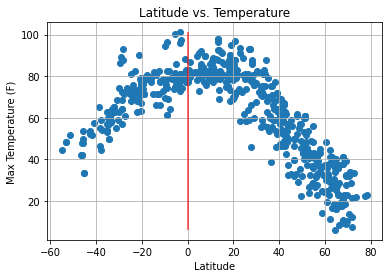

In [32]:
# Find and set the data to work with: Latitude and Max Temperature
lat_scatter = weather_df["Lat"]
temp_scatter = weather_df["Max Temperature"]

# Set the Labels for the Title, X-Axis, and Y-Axis
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Temperature")

# Add horizontal line for the "equator" and a grid to make it easier to read
plt.vlines(0, min(temp_scatter), max(temp_scatter), alpha=.75, color="red")
plt.grid()

# Populate and save the figure / plot
plt.scatter(lat_scatter, temp_scatter)
plt.savefig("../output_data/lat_vs_temp_fig.jpeg")

### About Latitude vs. Temperature Scatter Plot

The above plot looks at the Max Temperature as taken on the date the data was pulled from the OpenWeather API: Date, 10-20-2020. Along with the Max Temperature is the latitude of each city in the `weather_df` dataframe. "0" on the x-axis is the equater (represented by the red vertical line).

The scatter plot was used since there were multiple data points that were not categorical (ruling out bar/pie) and the data were not a time-series (since they were pulled at a specific point in time rather than over several points in time). 

#### Observations
* As the temperature increases, the points move closer to the equator (i.e., Lat = 0)
    * That being said, it favors positive latitude a bit right now (northern hemisphere), and it would be interesting to see if the change in jet streams and the earth's wobble / axis tilt change this data over time where we would see the warmest temperatures fluxuate between -20 and 20 degrees latitude.

## Latitude vs. Humidity Plot

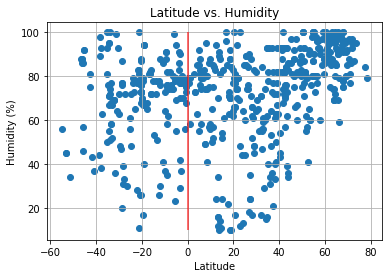

In [33]:
# Find and set the data to work with: Humidity and Latitude
lat_scatter = weather_df["Lat"]
humid_scatter = weather_df["Humidity"]

# Set the Labels for the Title, X-Axis, and Y-Axis
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity")

# Add horizontal line for the "equator" and a grid to make it easier to read
plt.vlines(0, min(humid_scatter), max(humid_scatter), alpha=.75, color="red")
plt.grid()

# Populate and save the figure / plot
plt.scatter(lat_scatter, humid_scatter)
plt.savefig("../output_data/lat_vs_humid_fig.jpeg")

In [29]:
lat_greater_50 = weather_df.loc[weather_df["Lat"] >= 50]
lat_greater_50 = lat_greater_50.reset_index()
lat_greater_50 = lat_greater_50.drop(columns={"index"})
lat_greater_50

,City,Lat,Lng,Date and Time,Max Temperature,Humidity,Cloudiness,Windspeed
0,Norman Wells,65.28,-126.83,2020-10-20 16:55:32,17.60,92,75,9.17
1,Grindavik,63.84,-22.43,2020-10-20 16:52:58,39.20,69,75,6.93
2,Longyearbyen,78.22,15.64,2020-10-20 16:55:45,23.00,79,41,3.36
3,Ilulissat,69.22,-51.10,2020-10-20 16:55:47,39.20,80,75,12.75
4,Severo-Kurilsk,50.68,156.12,2020-10-20 16:55:53,40.01,71,30,24.40
...,...,...,...,...,...,...,...,...
137,Belyy Yar,53.60,91.39,2020-10-20 17:07:51,42.80,60,80,4.47
138,Chunskiy,56.08,99.63,2020-10-20 17:07:57,31.68,98,100,6.26
139,Gubkinskiy,64.43,76.50,2020-10-20 17:08:03,28.09,97,100,6.87
140,Verkhnyaya Toyma,62.23,45.00,2020-10-20 17:08:09,29.05,97,100,7.45


### About Latitude vs. Humidity Scatter

Using the same functions as the first scatter, this one simply swaps out the temperature variable for humidity. 

#### Observations
* As of pulling the data, there is a cluster of values above 50 degrees latitude that I wanted to look at. Sampling just a few (Chunskiy, Verkhnyaya Toyma, Gubkinskiy), they were all in Russia. 
* By the eye, it looks as though for this sampling most of the humidity is in the northern hemisphere. This will be checked later with linear regression for correlation. 

## Latitude vs. Cloudiness Plot

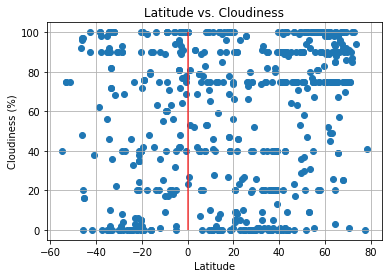

In [34]:
# Find and set the data to work with: Cloudiness and Latitude
lat_scatter = weather_df["Lat"]
cloud_scatter = weather_df["Cloudiness"]

# Set the Labels for the Title, X-Axis, and Y-Axis
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness")

# Add horizontal line for the "equator" and a grid to make it easier to read
plt.vlines(0, min(cloud_scatter), max(cloud_scatter), alpha=.75, color="red")
plt.grid()

# Populate and save the figure / plot
plt.scatter(lat_scatter, cloud_scatter)
plt.savefig("../output_data/lat_vs_cloud_fig.jpeg")

### Observations - Latitude vs. Cloudiness Scatter Plot
* Again, there doesn't seem to be any correlation between latitude and cloudiness, though we do have more datapoints in the northern hemisphere. This will be checked with linear regression, but it's quite possible that our random sampling pulled more values for the northern hemisphere than the southern. 

Actually, let's check that right now: 

In [41]:
count_northern = weather_df.loc[weather_df["Lat"] > 0].count().unique()
count_southern = weather_df.loc[weather_df["Lat"] < 0].count().unique()
hemisphere_data_counts = pd.DataFrame({"Count Northern": count_northern, "Count Southern": count_southern})
hemisphere_data_counts

,Count Northern,Count Southern
0,393,186


* It looks like we do have a little over double the count of northern hemisphere datapoints. This should be kept in mind when analyzing the data. 

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression